In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
#latest_date = engine.execute('SELECT MAX(date) FROM Measurement').fetchall()
latest_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f"Most Recent Date: {latest_date[0]}")

Most Recent Date: 2017-08-23


In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
latestdate = dt.datetime.strptime(latest_date[0], '%Y-%m-%d')

last_twelve_months = dt.date(latestdate.year -1, latestdate.month, latestdate.day)
last_twelve_months

query = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_twelve_months).all()

#Building dataframe
precipitation_df = pd.DataFrame(query, columns = ['Date','Precipitation'])
precipitation_df = precipitation_df.dropna(how='any') 
precipitation_df = precipitation_df.sort_values(["Date"], ascending=True)
precipitation_df = precipitation_df.set_index("Date")
precipitation_df.head()


,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.70
2016-08-23,0.15


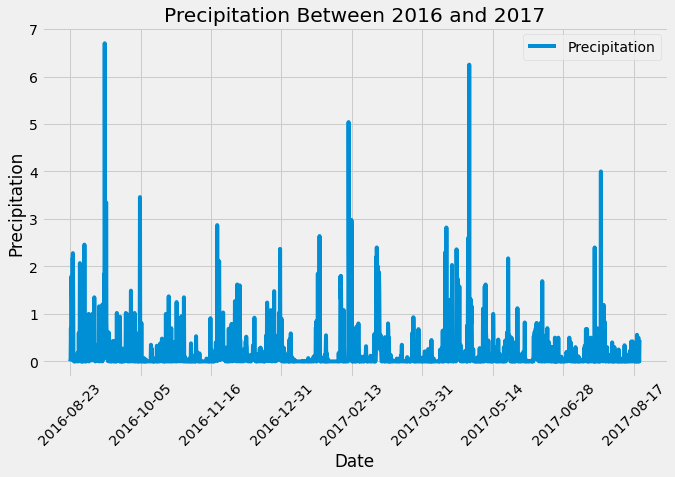

In [11]:
# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(figsize = (10,6))
plt.title('Precipitation Between 2016 and 2017')
plt.ylabel('Precipitation')
plt.xticks(rotation = 45)
plt.savefig("Images/precipitation_ratika.jpeg", bbox_inches = "tight")
plt.show()


In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
station_count=session.query(Station.id).count()
print(f'Total number of stations in the dataset : {station_count}')

Total number of stations in the dataset : 9


In [14]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
select = [Measurement.station,func.count(Measurement.id)]
active_stations = session.query(*select).\
                  group_by(Measurement.station).\
                  order_by(func.count(Measurement.id).desc()).all()
active_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
select = [func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)]
active_station_tobs = session.query(*select).filter(Measurement.station =='USC00519281').all()
active_station_tobs

[(54.0, 85.0, 71.66378066378067)]

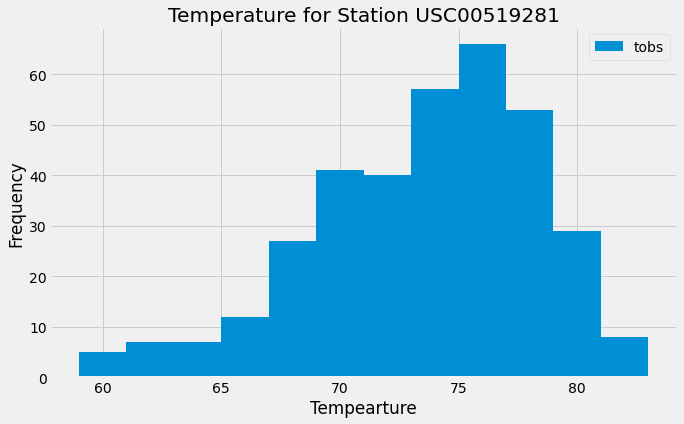

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

results = session.query(Measurement.date, Measurement.tobs).\
                        filter(Measurement.date >= last_twelve_months).\
                        filter(Measurement.station == active_stations[0][0]).all()
results_df = pd.DataFrame(results)

results_df.plot.hist(figsize = (10,6), bins=12)
plt.title(f'Temperature for Station {active_stations[0][0]}')
plt.xlabel('Tempearture')
plt.legend(["tobs"])
plt.savefig('Images/active_station_info_ratika.jpeg',bbox_inches = "tight")

plt.show()

# Close session

In [17]:
# Close Session
session.close()